<a href="https://colab.research.google.com/github/ArashVafa/PDDA/blob/master/PDDA_Machine_Learning_Competition_2020_D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.linear_model import LinearRegression, RidgeCV
#from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPRegressor

In [0]:
url = 'https://raw.githubusercontent.com/ArashVafa/PDDA/master/train.csv'

df = pd.read_csv(url)

In [0]:
df.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [0]:
df1 = pd.read_csv(url)

df1.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


Exploratory Data Analysis

In [0]:
# remove all rows that contains missing value
df1.replace(['-999', -999], np.nan, inplace=True)
df1.dropna(axis=0, inplace=True)
df1.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


In [0]:
df1.columns.tolist()

['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN', 'DTC', 'DTS']

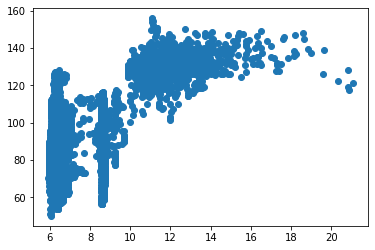

In [0]:
# check if there's any co-linearity between features
# you may check this for all of the features and see if there's any good finding. 
plt.scatter(df1['CAL'], df1['DTC'])

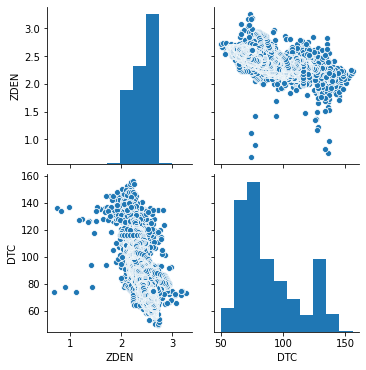

In [0]:
# another library from Seaborn to check the co-linearity
sb.pairplot(df1[['ZDEN', 'DTC']])

ADDING AN INDEX FIELD

I just add the codes , in case we want to use them later.

In [0]:
'''
df['index'] = pd.Series(range(0,df.shape[0]))
df.head()
'''

"\ndf['index'] = pd.Series(range(0,df.shape[0]))\ndf.head()\n"

Misleading values

In [0]:
df.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [0]:
import seaborn as sns

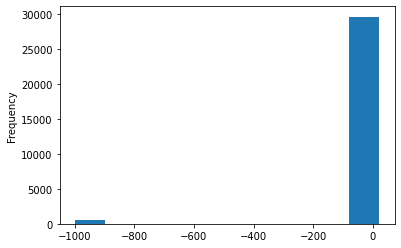

In [0]:
df['CAL'].plot(kind = 'hist')

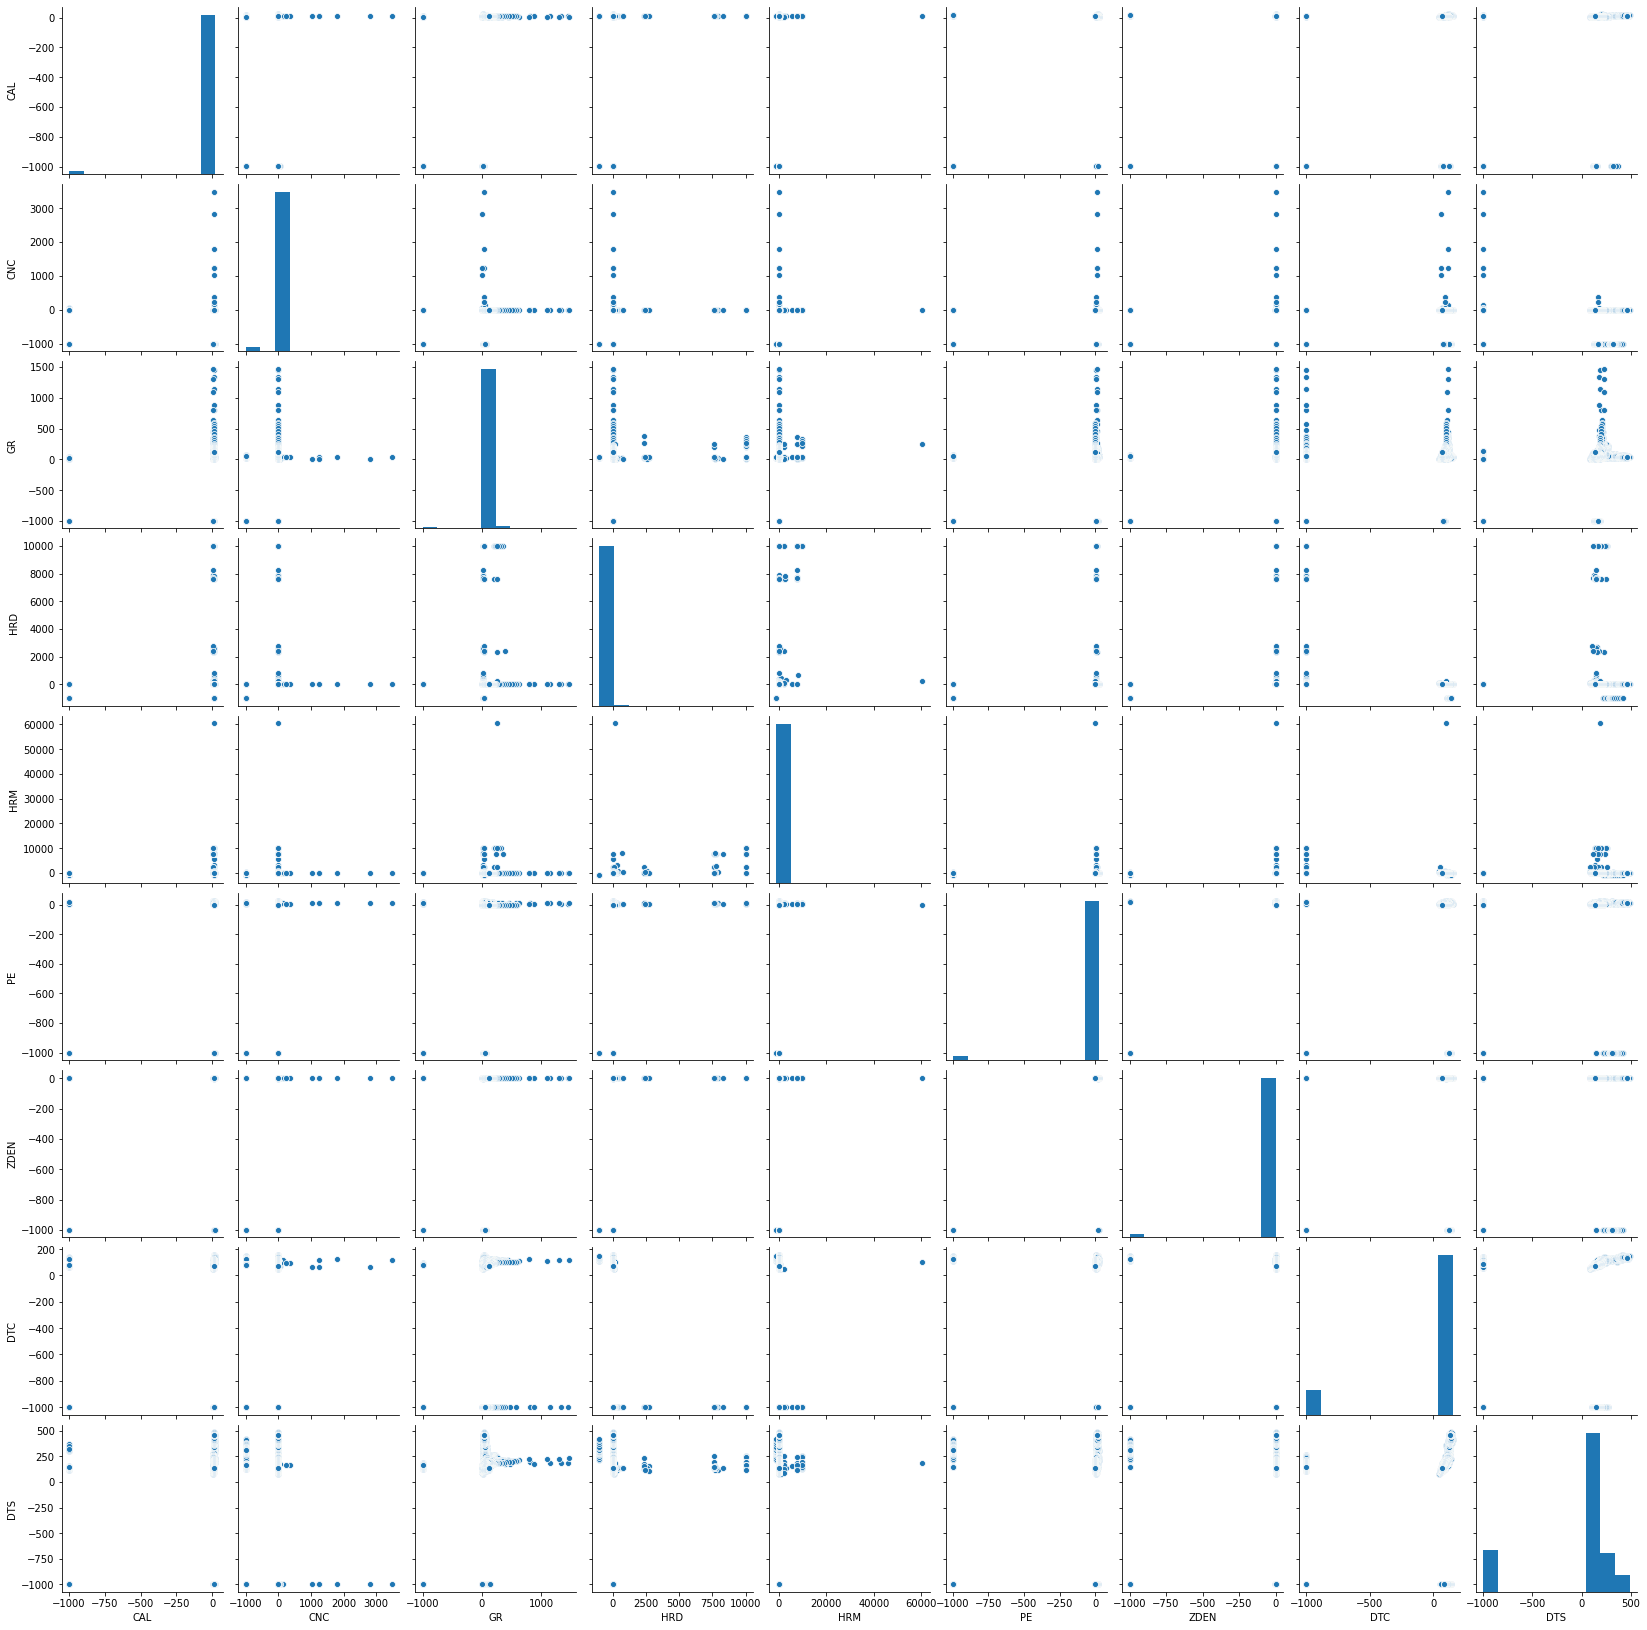

In [0]:
sns.pairplot(df)

In [0]:
df.replace(['-999', -999], np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


In [0]:
#sns.pairplot(df)

I think we still need to drop some values, for example CNC and HRM do not seem to have a linear relationship with DTC and DTS, can we ignore them, or make them categorical?

STANDARDIZING THE NUMERIC FIELDS

In [0]:
df.columns

Index(['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN', 'DTC', 'DTS'], dtype='object')

In [0]:
'''
from scipy import stats

for i in range(len(df.columns)):
  df[df.columns[i]] = stats.zscore(df[df.columns[i]])
  '''

'\nfrom scipy import stats\n\nfor i in range(len(df.columns)):\n  df[df.columns[i]] = stats.zscore(df[df.columns[i]])\n  '

In [0]:
df.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


I think standarzing the data especially CNC and getting rid of outliner is a good idea.

Outliers: A rough rule of thumb is that a data value is an outlier if its z‐value is either greater than 3, or less than −3. 

In [0]:
df['CNC'].nlargest(20)

13252    365.8850
13253    237.5623
13251     43.7264
1342       4.2411
1343       3.3349
950        2.5636
3194       2.5038
3360       2.3140
1341       2.2486
3195       2.1919
951        2.0934
1934       1.7510
19713      1.7196
3212       1.5188
2632       1.4604
2635       1.4560
949        1.4376
3361       1.4255
1425       1.3460
13250      1.3440
Name: CNC, dtype: float64

In [0]:
df['CNC'].nsmallest(20)

14708    0.0145
14707    0.0156
14706    0.0180
14709    0.0183
18916    0.0202
14705    0.0226
18917    0.0228
14710    0.0255
14734    0.0257
14735    0.0259
14711    0.0264
14704    0.0265
14733    0.0265
14699    0.0267
14700    0.0272
14712    0.0274
14703    0.0284
14701    0.0286
23371    0.0290
14702    0.0291
Name: CNC, dtype: float64

outliers


https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba



https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))

In [0]:
threshold = 3
print(np.where(z > 3))

(array([    0,     0,     1, ..., 18264, 18265, 18266]), array([0, 5, 0, ..., 4, 2, 2]))


In [0]:
df2 = df[(z < 3).all(axis=1)]
df2.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,19329.000000,19329.000000,19329.000000,19329.000000,19329.000000,19329.000000,19329.000000,19329.000000,19329.000000
mean,8.339734,0.231579,43.730003,2.433176,2.558751,3.626316,2.419941,87.022165,177.388806
std,1.726783,0.164797,34.597380,2.246535,5.652591,3.996015,0.173138,22.809885,79.527104
min,5.930400,0.026400,1.038900,0.129500,0.185300,-0.013100,1.887000,54.554900,96.900500
25%,6.606100,0.118800,15.379500,0.818100,0.803400,0.050200,2.242600,70.184500,126.726400
50%,8.578100,0.180900,36.699000,1.782100,1.798700,2.931500,2.477600,78.425900,140.886500
75%,8.656300,0.296600,59.974100,3.208000,3.352600,6.906900,2.565500,98.288500,188.117600
max,13.963400,4.241100,213.771500,12.989100,637.878300,16.944000,2.942800,155.980300,436.047700


In [0]:
df3 = df[(z < 1.5).all(axis=1)]
df3.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000
mean,7.798104,0.168698,37.370487,2.392295,2.617570,2.641527,2.467337,77.775682,143.149730
std,1.095919,0.077541,29.616422,1.726318,6.324872,3.516028,0.136985,11.773049,25.565598
min,5.930400,0.032400,1.038900,0.153600,0.185300,-0.002400,2.138400,55.407600,96.900500
25%,6.505300,0.112600,13.083325,0.938675,0.946075,0.048900,2.392625,69.207625,125.368075
50%,8.578100,0.153950,32.012750,2.230700,2.261950,0.057300,2.515850,74.773400,135.684600
75%,8.625000,0.216400,48.487750,3.277025,3.450825,6.055000,2.569800,85.560950,156.888325
max,11.177500,1.719600,132.096100,7.790700,637.878300,10.385900,2.682200,123.549900,308.693800


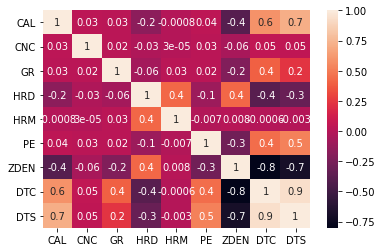

In [0]:
corrdf = df.corr()

sns.heatmap(corrdf, annot = True , fmt = '.1g')

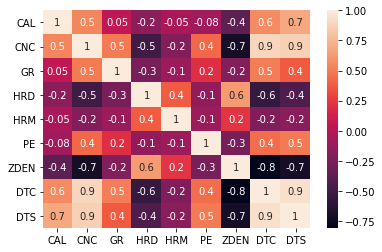

In [0]:
corrdf = df2.corr()

sns.heatmap(corrdf, annot = True , fmt = '.1g')

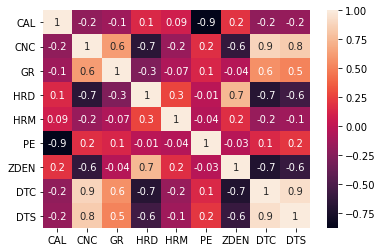

In [0]:
corrdf = df3.corr()

sns.heatmap(corrdf, annot = True , fmt = '.1g')

In [0]:
#how many data poitn are we deleting

df.shape[0] - df2.shape[0]

1196

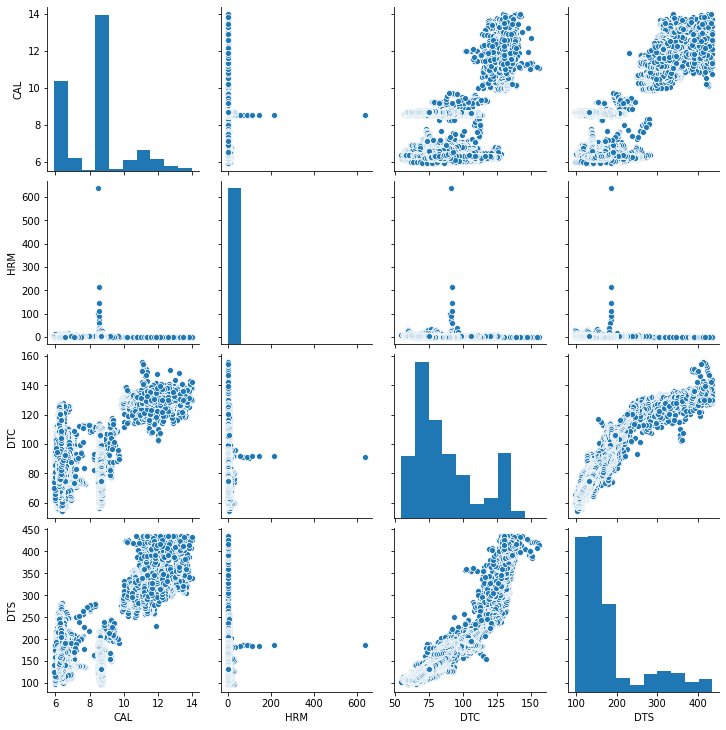

In [0]:
sns.pairplot(df2[['CAL', 'HRM', 'DTC', 'DTS']])

Maybe for HRM we migth be able to get rid of more outliers!

I thin z score less than 3 should be good, although the HRM still looks to have a lot of outliers. I am going to use df2

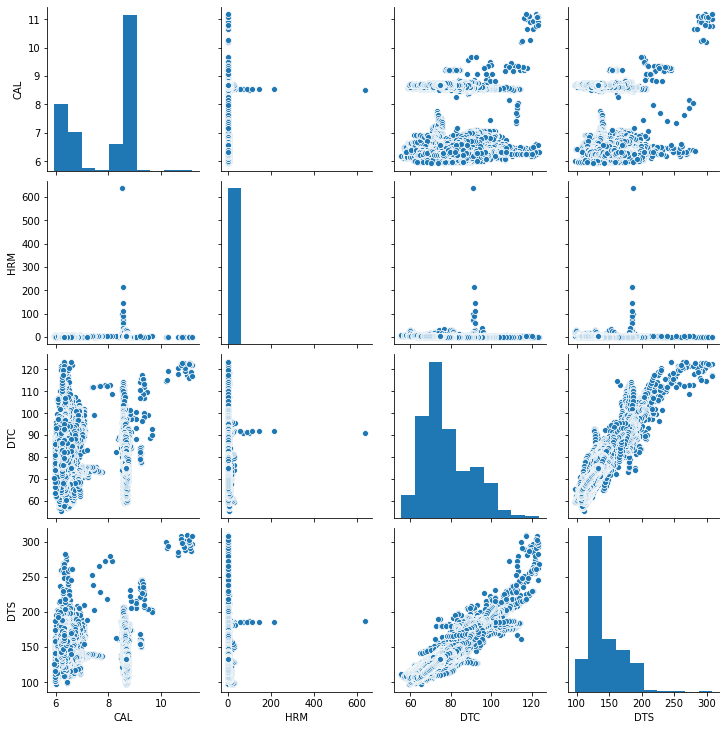

In [0]:
sns.pairplot(df3[['CAL', 'HRM', 'DTC', 'DTS']])

# PCA

**MULTICOLLINEARITY**

Data scientists need to guard against multicollinearity, a condition where some of the predictor variables are correlated with each other. Multicollinearity leads to instability in the solution space, leading, for example, to regression coefficients you cannot trust, because the coefficient variability is so large. Multicollinearity is an occupational hazard for data scientists, because many of the data sets have dozens if not hundreds of predictors, some of which are often correlated.

**IDENTIFYING MULTICOLLINEARITY USING VARIANCE INFLATION FACTORS**

However, suppose we did not check for the presence of correlation among our predictors, and went ahead and performed the regression anyway. Is there some way that the regression results can warn us of the presence of multicollinearity? The answer is yes: We may ask for the variance inflation factors (VIFs) to be reported.

The VIF for the ith predictor is given by:

VIFi = 1/(1-R2i) where R2i represents the R2 value obtained by regressing xi on the other predictor variables. Note that R2i will be large when xi is highly correlated with the other predictors, thus making VIFi large.

A rough rule of thumb for interpreting the value of the VIF is to consider VIFi ≥ 5 to be an indicator of moderate multicollinearity, and to consider VIFi ≥ 10 to be an indicator of severe multicollinearity. A VIF of five corresponds to R2i = 0.80, while VIFi = 10 corresponds to R2i = 0.80.

In [0]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

In [0]:
df2.columns

Index(['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN', 'DTC', 'DTS'], dtype='object')

In [0]:
x = df2[['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN']]
y = df2[['DTC', 'DTS']]

In [0]:
[inf.variance_inflation_factor(y.values, i) for i in range(y.shape[1])]

[26.229176413724122, 26.229176413724122]

In [0]:
[inf.variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

[48.353164252012114,
 12.819040134770262,
 4.1176676831008425,
 3.5488626835904546,
 1.4123521018742593,
 2.8412326954181135,
 38.69833649089302]

The VIF values of interest are for the predictor variables, which are the second, third, and fourth numbers output by the variance_inflation_factor() command.

In [0]:
x = StandardScaler().fit_transform(x)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4' , 'principal component 5'])


In [0]:
pca.explained_variance_ratio_

array([0.41641193, 0.16407124, 0.14969478, 0.11458335, 0.09344501])

How many compnents should we use?

In [0]:
# standardize the features
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = sc.transform(x)

In [0]:
import numpy as np

cov_mat = np.cov(x_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [0]:
eigen_vals

array([2.9150343 , 0.12932314, 0.30325505, 1.14855814, 1.04791767,
       0.65414893, 0.80212493])

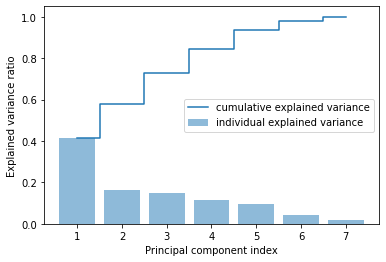

In [0]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,eigen_vals.size+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,eigen_vals.size+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [0]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.768456,1.782190,1.034066,0.494810,-1.147597
1,-2.966742,1.729475,1.026135,0.499157,-1.011062
2,-2.992131,1.707650,1.006605,0.440505,-0.978314
3,-2.948994,1.628468,0.984900,0.404716,-0.945465
4,-3.027071,1.611160,1.020919,0.400306,-0.953354


I have some issues adding target variables in this new DF.

In [0]:
finalDf = pd.concat([principalDf, df2[['DTC', 'DTS']]], axis = 1)
finalDf.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,DTC,DTS
30138,NaN,NaN,NaN,NaN,NaN,74.2133,131.7747
30139,NaN,NaN,NaN,NaN,NaN,74.3503,132.2201
30140,NaN,NaN,NaN,NaN,NaN,74.4752,132.5171
30141,NaN,NaN,NaN,NaN,NaN,74.5917,132.7115
30142,NaN,NaN,NaN,NaN,NaN,74.7082,132.9060


# EDA?

# Dataset Splitting

In [0]:
from sklearn.preprocessing import StandardScaler

# seperate the features and targets
df1_data = np.array(df2)
y_trainwell1 = df1_data[:,-2:]
x_trainwell1 = df1_data[:,:-2]

# standize the matrix for training data
scaler = StandardScaler()
x_trainwell1 = scaler.fit_transform(x_trainwell1)

In [0]:
np.shape(y_trainwell1)

(19329, 2)

In [0]:
# train test split
# please remember to use random_state for all randomization steps, this will ensure we get the same results 
# as yours during the validation phase. 
X_train, X_test, y_train, y_test = train_test_split(x_trainwell1, y_trainwell1, test_size=0.2, random_state=100)

In [0]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        scoring='r2', 
                        cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [0]:
def result_plot(y_predict, y_real=y_trainwell1):
    # check the accuracy of predicted data and plot the result
    print('Root Mean Square Error is:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    plt.subplots(nrows=2, ncols=2, figsize=(16,10))
    plt.subplot(2, 2, 1)
    plt.plot(y_real[:, 0])
    plt.plot(y_predict[:, 0])
    plt.legend(['True', 'Predicted'])
    plt.xlabel('Sample')
    plt.ylabel('DTC')
    plt.title('DTC Prediction Comparison')

    plt.subplot(2, 2, 2)
    plt.plot(y_real[:, 1])
    plt.plot(y_predict[:, 1])
    plt.legend(['True', 'Predicted'])
    plt.xlabel('Sample')
    plt.ylabel('DTS')
    plt.title('DTS Prediction Comparison')
    
    plt.subplot(2, 2, 3)
    plt.scatter(y_real[:, 0], y_predict[:, 0])
    plt.xlabel('Real Value')
    plt.ylabel('Predicted Value')
    plt.title('DTC Prediction Comparison')
    
    plt.subplot(2, 2, 4)
    plt.scatter(y_real[:, 1], y_predict[:, 1])
    plt.xlabel('Real Value')
    plt.ylabel('Predicted Value')
    plt.title('DTS Prediction Comparison')

    plt.show()

# Linear Regression

0.9260811139333114
Root Mean Square Error is: 16.06838


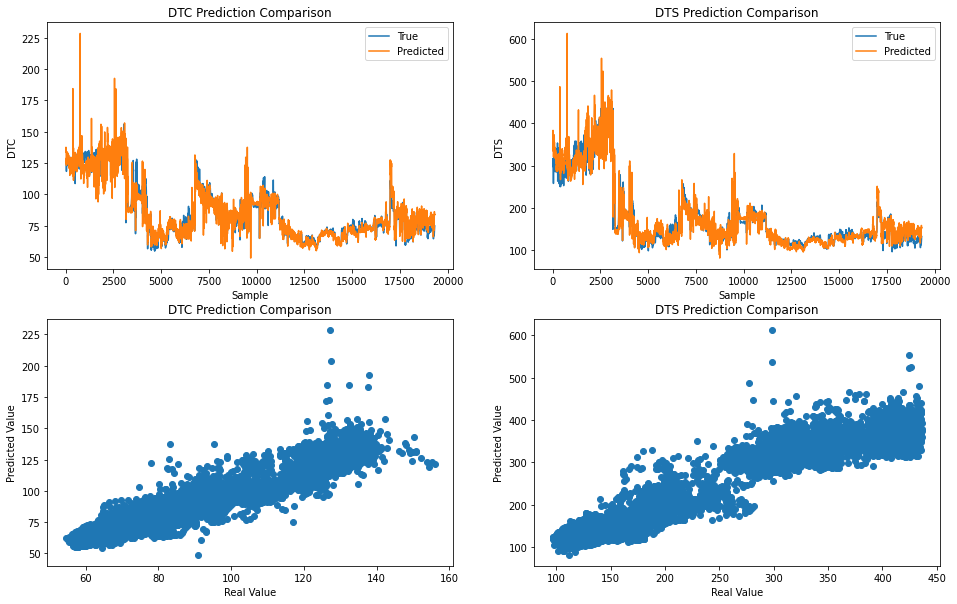

In [0]:
LR = LinearRegression()
LR_best = grid_search(LR, {})
LR_predict = LR_best.predict(x_trainwell1)
result_plot(LR_predict, y_trainwell1)

# Ridge Regularization

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

Accuracy Score is: 0.92288
Root Mean Square Error is: 16.06838


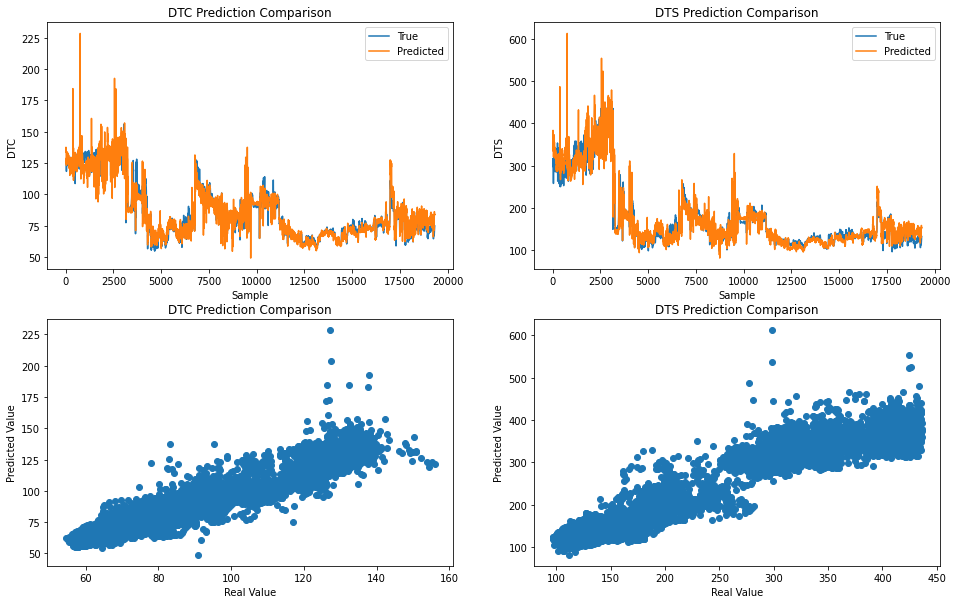

In [0]:
# Add ridge regularization, and see if there's any improvement
ridge = RidgeCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], )
ridge.fit(X_train, y_train)
print('Accuracy Score is:', '{:.5f}'.format(ridge.score(X_train, y_train)))
result_plot(ridge.predict(x_trainwell1), y_trainwell1)

# Ridge Regression

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.


https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [0]:
#I have this part just to compare with RR

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9228811613784453
linear regression test score: 0.9304123289837535
ridge regression train score low alpha: 0.9228811613781029
ridge regression test score low alpha: 0.9304123096561139
ridge regression train score high alpha: 0.9228489832578969
ridge regression test score high alpha: 0.9301913473211217


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

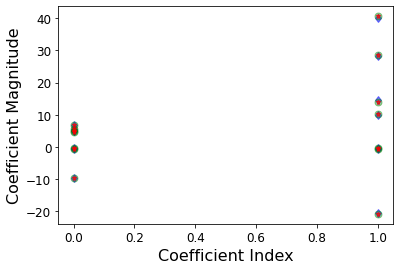

In [0]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
#plt.legend(fontsize=8, loc = 9)
plt.show()

Let’s understand the figure above. In X axis we plot the coefficient index and, for our data there are 7 features (for Python 0th index refers to 1st feature). 

For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

# Random Forest

0.9881592867022105
Root Mean Square Error is: 2.98479


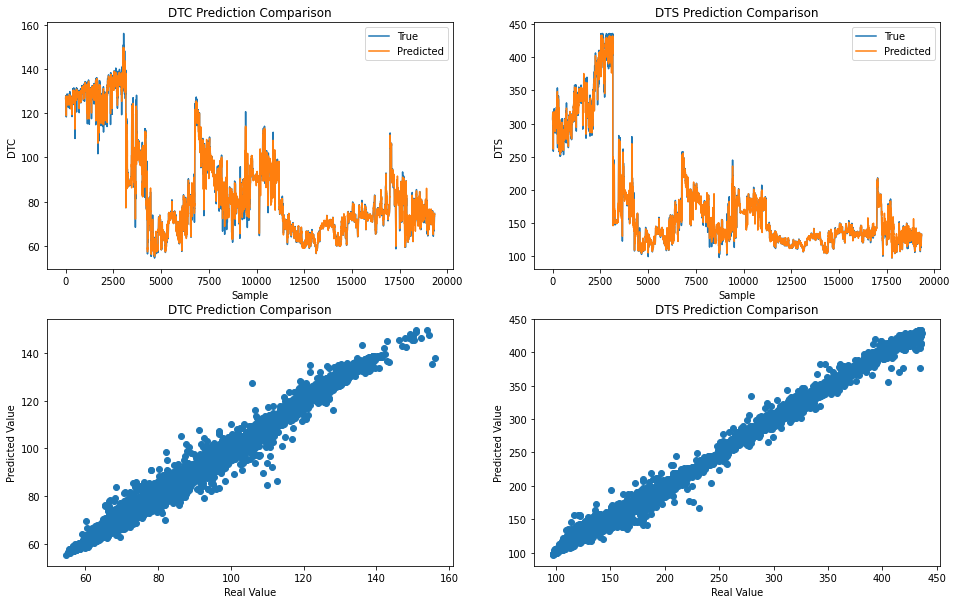

In [0]:
# Random forest model
RF = RandomForestRegressor(n_estimators=100, random_state=100)
RF_best = grid_search(RF, {})
result_plot(RF_best.predict(x_trainwell1), y_trainwell1)

Root Mean Square Error is: 5.29633


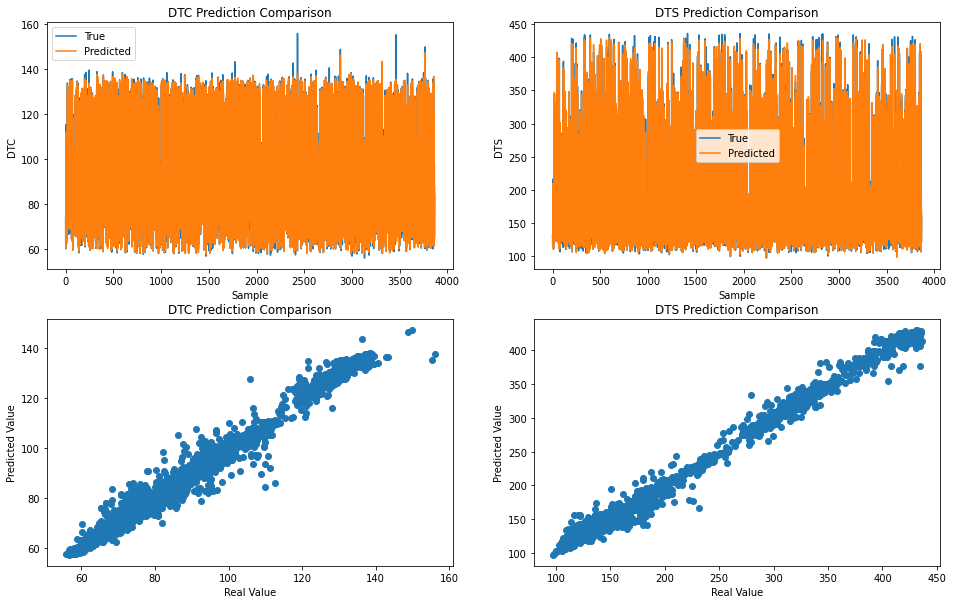

In [0]:
# check the result on test dataset only
result_plot(RF_best.predict(X_test), y_test)

Interesting: RMSE error in the test part of this model (z standardized) is barely less than the one in the competition.

# LASSO

# XGboost

# Feed Forward Neural Networks

It works one by one? how can we define metrics etc, can we do for both target variables?


https://towardsdatascience.com/feed-forward-neural-networks-c503faa46620

In [0]:
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

In [0]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                metrics=['mse']) # Mean squared error

In [0]:
y_train[:,1]

array([345.0294, 149.9425, 186.5146, ..., 124.666 , 114.5494, 137.4463])

In [0]:
# Train neural network
history = network.fit(X_train, # Features
                      y_train[:,0], # Target vector
                      epochs=10, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test[:,0])) # Data for evaluation

In [0]:
# Train neural network
history = network.fit(X_train, # Features
                      y_train[:,1], # Target vector
                      epochs=10, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test[:,1])) # Data for evaluation